# Agent-Based Modelling of Complex Systems

Objective of the project is to implement Nagel-Shreckenberg model of a road traffic flow that can reproduce traffic jams.

In [453]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

In [257]:
def initial_road(rho,N):
'''This function returns an N-sized array representing a road, numbers 0-5 represent cars and number 9 is an empty cell. Rho is a density of cars on the road.'''
    road = np.full(N,9)
    for i in range(N):
        if random.random() < rho:
            road[i] = random.randint(0,5)
    return road

In [383]:
def nagel_shreckenberg_plot(steps, p, N, rho):
'''This function returns average velocity of the system depending on the value of rho and a list of N-sized arrays representing
a road in each step.
Steps represents how many times a car moves. 
p is a value of probabilty with which a car slows down by one unit.'''    
    velocity = []
    road = initial_road(rho,N)
    roads = [road]

    for k in range(steps):
            #acceleration
        for i in range(N):
            if (road[i] == np.array([0,1,2,3,4])).any():
                road[i] += 1
            #slowing down
        cars = np.where(road<6)[0]
        for i in range(len(cars)):
            if i != len(cars)-1:
                diff = cars[i+1] - cars[i]-1
            else:
                diff = N + (cars[0] - cars[i]-1)
            if road[cars[i]] > diff:
                road[cars[i]] = diff
            #randomization
        cars_moving = np.where((0<road) & (road<6))[0]
        for i in cars_moving:
            if random.random() < p:
                road[i] -= 1
            #car motion
        cars_moving = np.where((0<road) & (road<6))[0]
        for i in cars_moving:
            if i+road[i] <= N-1:
                road[i+road[i]] = road[i]
                road[i] = 9
            else:
                road[abs(N-(i+road[i]))] = road[i]
                road[i] = 9
        
        velocity_single = []       
        cars_moving = np.where(road<6)[0]
        for i in cars_moving:
            velocity_single.append(road[i])
        velocity.append(np.mean(velocity_single))
        
        road2 = np.copy(road)
        roads.append(road2)
    velocity_rho = np.mean(velocity)
    
    return velocity_rho, roads

In [387]:
a1, r1 = nagel_shreckenberg_plot(100, 0, 100, 0.1)
a2, r2 = nagel_shreckenberg_plot(100, 0, 100, 0.2)
a3, r3 = nagel_shreckenberg_plot(100, 0, 100, 0.6)
a4, r4 = nagel_shreckenberg_plot(100, 0.3, 100, 0.1)
a5, r5 = nagel_shreckenberg_plot(100, 0.3, 100, 0.2)
a6, r6 = nagel_shreckenberg_plot(100, 0.3, 100, 0.6)
a7, r7 = nagel_shreckenberg_plot(100, 0.6, 100, 0.1)
a8, r8 = nagel_shreckenberg_plot(100, 0.6, 100, 0.2)
a9, r9 = nagel_shreckenberg_plot(100, 0.6, 100, 0.6)

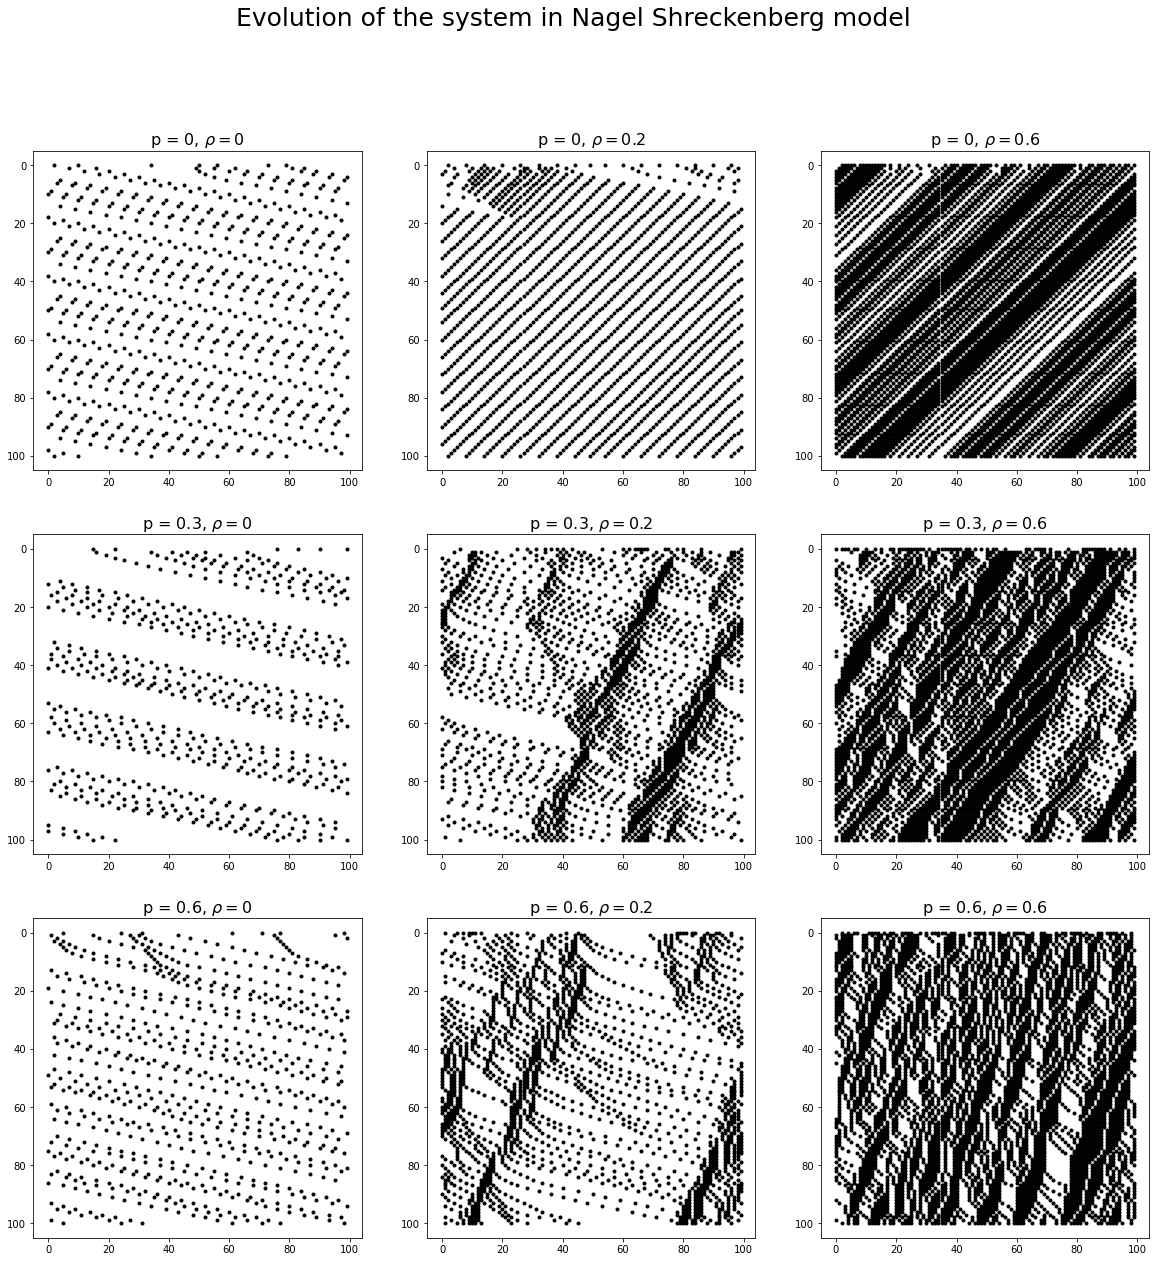

In [454]:
fig, axs = plt.subplots(3,3, figsize=(20, 20)) 
fig.suptitle('Evolution of the system in Nagel Shreckenberg model', fontsize=25)

subplot_x = 0
subplot_y = 0

rho = [0, 0.2, 0.6]
p = [0, 0.3, 0.6]

yticks = [0,20,40,60,80,100,120]

for road in [r1,r2,r3,r4,r5,r6,r7,r8,r9]:
    counter = 100
    for i in road:
        car_plot = np.where(i<6)[0] 
        #plt.plot(car_plot, len(car_plot) * [counter], 'k.')
        axs[subplot_y,subplot_x].plot(car_plot, len(car_plot) * [counter], 'k.')
        axs[subplot_y,subplot_x].set_title('p = ' + str(p[subplot_y]) + r', $\rho = $' + str(rho[subplot_x]), fontdict = {'fontsize' : 16})
        axs[subplot_y,subplot_x].set_yticklabels(yticks[::-1])
        counter -=1
     
    
    subplot_x +=1
    if subplot_x == 3:
        subplot_x = 0
        subplot_y +=1
filename = "fig1.png"
plt.savefig(filename)
plt.show()

In [ ]:
def nagel_shreckenberg(steps, p, N, rho):
'''This function returns average velocity of the system depending on the value of rho. 
Steps represents how many times a car moves. p is a value of probabilty with which a car slows down by one unit.'''      
    velocity = []
    road = initial_road(rho,N)
    for k in range(steps):
            #acceleration
        for i in range(N):
            if (road[i] == np.array([0,1,2,3,4])).any():
                road[i] += 1
            #slowing down
        cars = np.where(road<6)[0]
        for i in range(len(cars)):
            if i != len(cars)-1:
                diff = cars[i+1] - cars[i]-1
            else:
                diff = N + (cars[0] - cars[i]-1)
            if road[cars[i]] > diff:
                road[cars[i]] = diff
            #randomization
        cars_moving = np.where((0<road) & (road<6))[0]
        for i in cars_moving:
            if random.random() < p:
                road[i] -= 1
            #car motion
        cars_moving = np.where((0<road) & (road<6))[0]
        for i in cars_moving:
            if i+road[i] <= N-1:
                road[i+road[i]] = road[i]
                road[i] = 9
            else:
                road[abs(N-(i+road[i]))] = road[i]
                road[i] = 9
                
        velocity_single = []       
        cars_moving = np.where(road<6)[0]
        for i in cars_moving:
            velocity_single.append(road[i])
        velocity.append(np.mean(velocity_single))
    velocity_rho = np.mean(velocity)
    return velocity_rho

In [334]:
average_1 = []
average_2 = []
average_3 = []
for rho in np.linspace(0.05, 0.95, 19):
    average_rho_1 = []
    average_rho_2 = []
    average_rho_3 = []
    for i in range(100):
        average_rho_1.append(nagel_shreckenberg(100, 0, 100, rho))
        average_rho_2.append(nagel_shreckenberg(100, 0.3, 100, rho))
        average_rho_3.append(nagel_shreckenberg(100, 0.6, 100, rho))
    average_1.append(np.mean(average_rho_1))
    average_2.append(np.mean(average_rho_2))
    average_3.append(np.mean(average_rho_3))

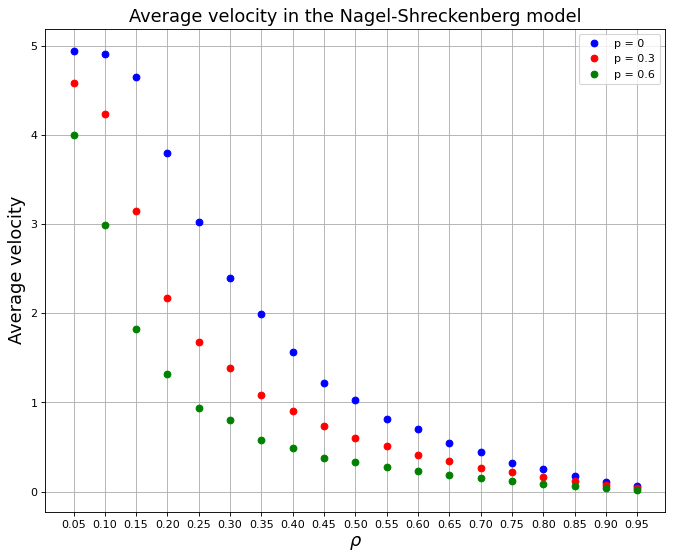

In [429]:
x = np.linspace(0.05, 0.95, 19)
figure(figsize=(10, 8), dpi=80)
plt.plot(x, average_1, 'bo', label = 'p = 0')
plt.plot(x, average_2, 'ro', label = 'p = 0.3')
plt.plot(x, average_3, 'go', label = 'p = 0.6')
plt.legend(loc="upper right")
plt.xticks(x)
plt.grid()
plt.xlabel(r'$\rho$', fontsize=16)
plt.ylabel('Average velocity', fontsize=16)
plt.title('Average velocity in the Nagel-Shreckenberg model', fontsize=16)
filename = "fig2.png"
plt.savefig(filename)
plt.show()